## Regresión Lineal - Predicción precio del automóvil
## Universidad Nacional Abierta y a Distancia - UNAD
## Curso: Análisis de datos

Contiene información técnica y de mercado de automóviles. El objetivo es predecir el precio del automóvil en función de sus atributos

In [1]:
#Importar las librerias necesarias para el desarrollo de la actividad
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import hvplot.pandas
import time
import scipy.stats as stats

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# lectura de datos en Python
Datos = pd.read_csv('C:/Users/USUARIO/Documents/Analisis de Datos/Car details v3.csv')

In [3]:
#Lectura de los datos para el análisis exploratorio
Datos.head(50)

,nombre,edad,precio_venta,km_recorridos,combustible,tipo_vendedor,transmision,propietario,kilometraje,motor,potencia,torque,asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,"Maruti Wagon R LXI DUO BSIII,2007,96000,175000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nombre         8128 non-null   object 
 1   edad           7787 non-null   float64
 2   precio_venta   7787 non-null   float64
 3   km_recorridos  7787 non-null   float64
 4   combustible    7787 non-null   object 
 5   tipo_vendedor  7787 non-null   object 
 6   transmision    7787 non-null   object 
 7   propietario    7787 non-null   object 
 8   kilometraje    7566 non-null   object 
 9   motor          7566 non-null   object 
 10  potencia       7572 non-null   object 
 11  torque         7565 non-null   object 
 12  asientos       7566 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


In [5]:
num_filas, num_columnas = Datos.shape

# Imprimir el número de filas y columnas
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 8128
Número de columnas: 13


In [6]:
# Descripción de los datos
Datos.describe()

,edad,precio_venta,km_recorridos,asientos
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Comprobando valores nulos
Datos.isnull().sum()*100/Datos.shape[0]

#Se logra determinar que en algunas variables se encuentran varoles nulos.

nombre           0.000000
edad             4.195374
precio_venta     4.195374
km_recorridos    4.195374
combustible      4.195374
tipo_vendedor    4.195374
transmision      4.195374
propietario      4.195374
kilometraje      6.914370
motor            6.914370
potencia         6.840551
torque           6.926673
asientos         6.914370
dtype: float64

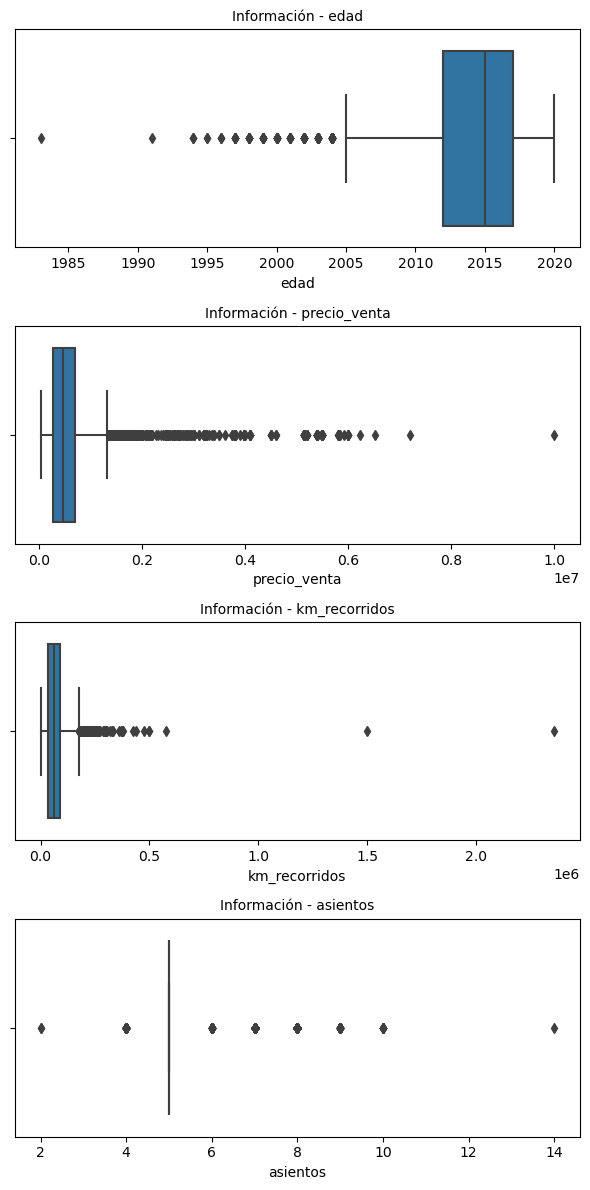

In [8]:
#Identificación de valores faltantes y atípicos mediante una grafica 

# Lista de columnas númericas
columnas_interes = ['edad', 'precio_venta', 'km_recorridos','asientos']

# Tamaño del gráfico
plt.figure(figsize=(6, 3 * len(columnas_interes)))

# Generar gráficos de caja para cada columna
for i, columna in enumerate(columnas_interes, start=1):
    plt.subplot(len(columnas_interes), 1, i)
    sns.boxplot(x = Datos[columna])
    plt.title(f'Información - {columna}', fontsize=10)

plt.tight_layout()
plt.show()

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [9]:
#Revisión de datos faltantes
variables = {'edad','precio_venta','km_recorridos','combustible','tipo_vendedor','transmision','propietario','kilometraje','motor','potencia','torque','asientos'}

for variables in variables:
    print("Cantidad de Registros Vacíos en {}: {}".format(variables.capitalize(), Datos[variables].isna().sum()))

Cantidad de Registros Vacíos en Combustible: 341
Cantidad de Registros Vacíos en Asientos: 562
Cantidad de Registros Vacíos en Km_recorridos: 341
Cantidad de Registros Vacíos en Kilometraje: 562
Cantidad de Registros Vacíos en Precio_venta: 341
Cantidad de Registros Vacíos en Propietario: 341
Cantidad de Registros Vacíos en Tipo_vendedor: 341
Cantidad de Registros Vacíos en Potencia: 556
Cantidad de Registros Vacíos en Edad: 341
Cantidad de Registros Vacíos en Transmision: 341
Cantidad de Registros Vacíos en Motor: 562
Cantidad de Registros Vacíos en Torque: 563


In [10]:
# Manejo de datos faltantes 
# Reemplazar todos los valores vacios con el valor medio (promedio) de la columna cuando la variable es númerica
# Cuando la variable es categorica se imputa los valores con la moda de dicha variable.

for variables in Datos.columns:
    if Datos[variables].dtype == 'object':  # Comprobando si la columna es categórica
        Datos[variables].fillna(Datos[variables].mode()[0], inplace=True)  # Imputar con la moda
    else:
        Datos[variables].fillna(Datos[variables].mean(), inplace=True)  # Imputar con la media

In [11]:
#Revisión de datos faltantes
for variable in Datos.columns:
    print("Cantidad de registros vacíos en {}: {}".format(variable.capitalize(), Datos[variable].isna().sum()))

Cantidad de registros vacíos en Nombre: 0
Cantidad de registros vacíos en Edad: 0
Cantidad de registros vacíos en Precio_venta: 0
Cantidad de registros vacíos en Km_recorridos: 0
Cantidad de registros vacíos en Combustible: 0
Cantidad de registros vacíos en Tipo_vendedor: 0
Cantidad de registros vacíos en Transmision: 0
Cantidad de registros vacíos en Propietario: 0
Cantidad de registros vacíos en Kilometraje: 0
Cantidad de registros vacíos en Motor: 0
Cantidad de registros vacíos en Potencia: 0
Cantidad de registros vacíos en Torque: 0
Cantidad de registros vacíos en Asientos: 0


In [12]:
for columna in columnas_interes:
    # Calcular los cuartiles y el rango intercuartílico (IQR)
    Q1 = Datos[columna].quantile(0.25)
    Q3 = Datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites para identificar los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    valores_atipicos = ((Datos[columna] < limite_inferior) | (Datos[columna] > limite_superior)).sum()
    
    # Imprimir los valores atípicos
    print(f"Datos atípicos de {columna} es: {valores_atipicos}")

Datos atípicos de edad es: 200
Datos atípicos de precio_venta es: 625
Datos atípicos de km_recorridos es: 228
Datos atípicos de asientos es: 1560


In [13]:
# Creación de un DataFrame para almacenar los datos filtrados
Datos_filtrados = Datos.copy()

for columna in columnas_interes:
    # Calcular los cuartiles y el rango intercuartílico (IQR)
    Q1 = Datos[columna].quantile(0.25)
    Q3 = Datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites para identificar los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificar los valores atípicos
    valores_atipicos = Datos[(Datos[columna] < limite_inferior) | (Datos[columna] > limite_superior)][columna]
    
    # Filtrar los datos para eliminar los valores atípicos
    Datos_filtrados = Datos_filtrados[(Datos_filtrados[columna] >= limite_inferior) & (Datos_filtrados[columna] <= limite_superior)]

# Verificar el tamaño de los datos filtrados
print("Tamaño de los datos filtrados:")
print(Datos_filtrados.shape)

Tamaño de los datos filtrados:
(5888, 13)


In [14]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nombre         8128 non-null   object 
 1   edad           8128 non-null   float64
 2   precio_venta   8128 non-null   float64
 3   km_recorridos  8128 non-null   float64
 4   combustible    8128 non-null   object 
 5   tipo_vendedor  8128 non-null   object 
 6   transmision    8128 non-null   object 
 7   propietario    8128 non-null   object 
 8   kilometraje    8128 non-null   object 
 9   motor          8128 non-null   object 
 10  potencia       8128 non-null   object 
 11  torque         8128 non-null   object 
 12  asientos       8128 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


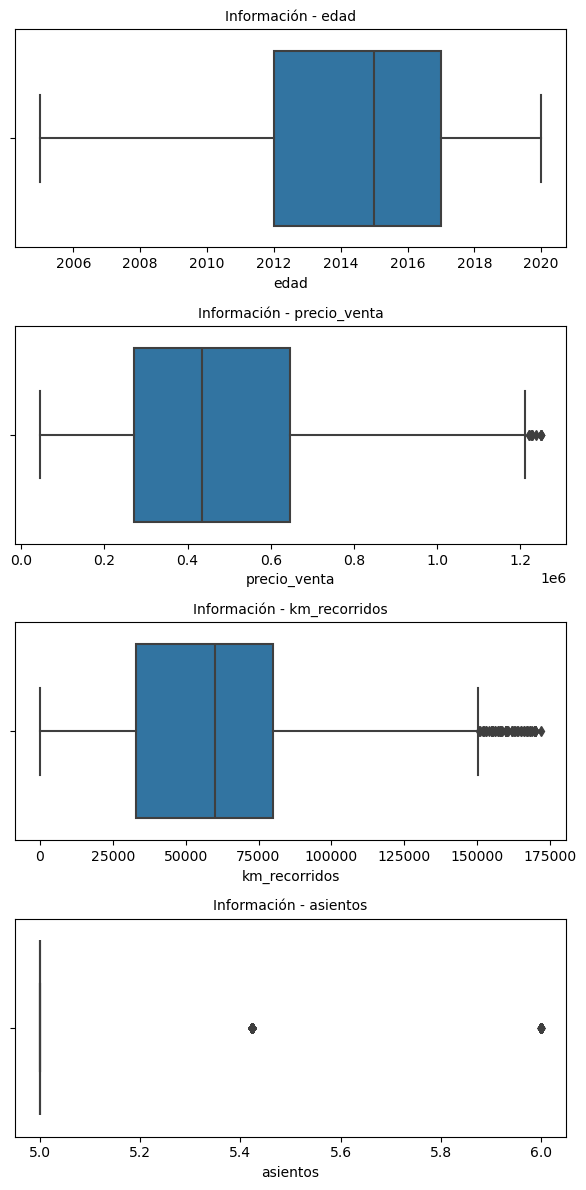

In [15]:
#Revisión de eliminación de valores faltantes y atípicos mediante una grafica 

# Tamaño del gráfico
plt.figure(figsize=(6, 3 * len(columnas_interes)))

# Generar gráficos de caja para cada columna
for i, columna in enumerate(columnas_interes, start=1):
    plt.subplot(len(columnas_interes), 1, i)
    sns.boxplot(x = Datos_filtrados[columna])
    plt.title(f'Información - {columna}', fontsize=10)

plt.tight_layout()
plt.show()

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:
- Variable dependiente (Precio del automóvil)
- Predecir el precio del automóvil en función de sus atributos.

In [16]:
# Variable dependiente
Datos_filtrados[['precio_venta']].value_counts ()
Datos_filtrados[['precio_venta']].head (40)

,precio_venta
0,4.500000e+05
1,3.700000e+05
2,6.566975e+05
3,2.250000e+05
4,6.566975e+05
5,4.400000e+05
6,6.566975e+05
8,3.500000e+05
9,2.000000e+05
10,5.000000e+05


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [17]:
# Aplicamos la codificación one-hot
df_encoded = pd.get_dummies(Datos_filtrados, columns=['nombre','combustible','tipo_vendedor','transmision','propietario','kilometraje','motor','potencia','torque'])

In [18]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos_filtrados[['edad', 'km_recorridos','asientos']] # Se cargan los datos de train sin los datos de la columna Precio_de_venta 
Y = Datos_filtrados['precio_venta'] # Se cargan los datos de train con los datos de la la columna Precio_de_venta

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [19]:
print (X_train)

        edad  km_recorridos  asientos
7938  2018.0        40000.0       5.0
4275  2016.0       120000.0       5.0
2153  2015.0        23500.0       5.0
524   2016.0        30000.0       5.0
2512  2010.0       120000.0       5.0
...      ...            ...       ...
6824  2011.0        40000.0       5.0
4534  2018.0        17000.0       5.0
2316  2013.0        69000.0       5.0
3613  2012.0       129000.0       5.0
3780  2015.0        50000.0       5.0

[4416 rows x 3 columns]


In [20]:
print(Y_train)

7938    1200000.0
4275     350000.0
2153     250000.0
524      400000.0
2512     200000.0
          ...    
6824     150000.0
4534     678000.0
2316     525000.0
3613     400000.0
3780     480000.0
Name: precio_venta, Length: 4416, dtype: float64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [21]:
# Construir el modelo de regresión lineal 

modelo_regresion = LinearRegression () # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [22]:
print (Y_test)

6768    330000.0
421     600000.0
6908    145000.0
5555    459999.0
2577    160000.0
          ...   
7923    500000.0
1570    950000.0
6475    210000.0
5843    574000.0
748     360000.0
Name: precio_venta, Length: 1472, dtype: float64


In [23]:
print (prediccion)

[337418.02804503 628344.34287855 387277.86217584 ... 433620.504889
 428705.81608139 577338.0215853 ]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [24]:
#Métricas
metrics = {
    'Error Cuadrático Medio (MSE)': mean_squared_error,
    'Raíz del Error Cuadrático Medio (RMSE)': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'Error Absoluto Medio (MAE)': mean_absolute_error,
    'Coeficiente de Determinación (R²)': r2_score
}

# Calcular las métricas
metric_results = {metric_name: metric_func(Y_test, prediccion) for metric_name, metric_func in metrics.items()}

# Imprimir métricas
print("Métricas del modelo de regresión lineal:")
for metric_name, metric_value in metric_results.items():
    print(f"{metric_name}: {metric_value}")
    

Métricas del modelo de regresión lineal:
Error Cuadrático Medio (MSE): 29247356963.937374
Raíz del Error Cuadrático Medio (RMSE): 171018.58660372964
Error Absoluto Medio (MAE): 131471.34765661298
Coeficiente de Determinación (R²): 0.46063651656045523


### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

La ecuación de la recta es: Y = -98740691.51993929 + 48687.43699158355*X


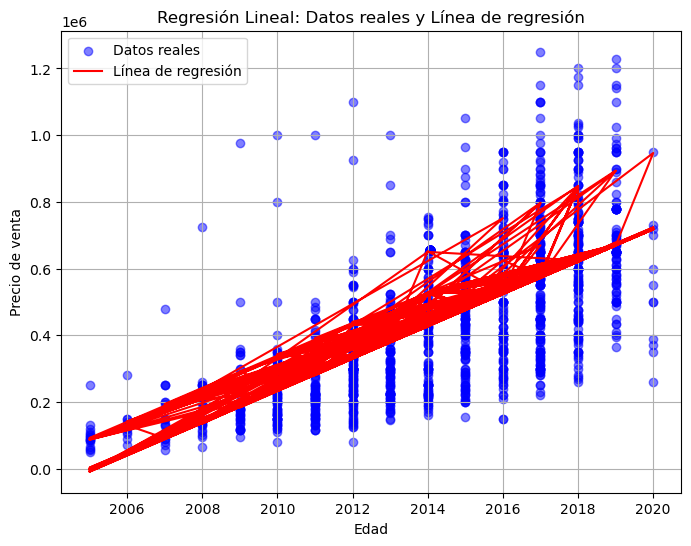

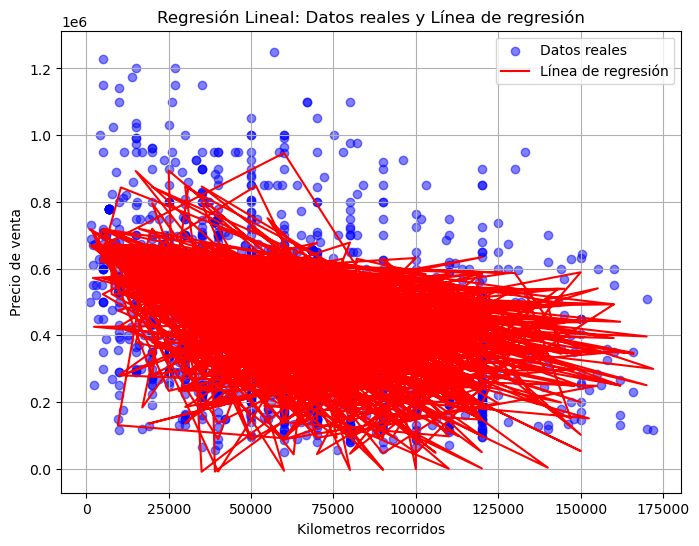

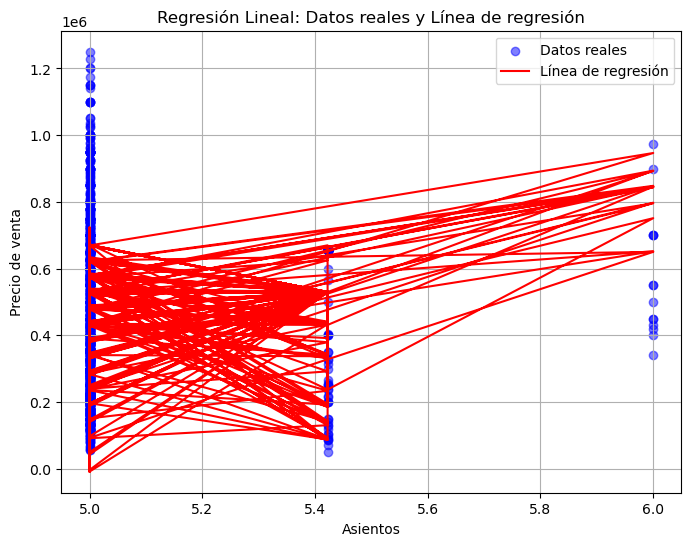

In [25]:
# Mostrar ecuación de la recta
print(f"La ecuación de la recta es: Y = {modelo_regresion.intercept_} + {modelo_regresion.coef_[0]}*X")

# Gráfico de la línea de regresión junto con los datos reales en el conjunto de prueba

plt.figure(figsize=(8, 6))

# Graficar los datos reales
plt.scatter(X_test['edad'], Y_test, color='blue', label='Datos reales', alpha=0.5)

# Graficar la línea de regresión
plt.plot(X_test['edad'], prediccion, color='red', label='Línea de regresión')

plt.xlabel('Edad')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Datos reales y Línea de regresión')
plt.legend()
plt.grid(True)
plt.show()
#--------------------------------------------------------------------------------------------------------#
# Gráfico de la línea de regresión junto con los datos reales en el conjunto de prueba

plt.figure(figsize=(8, 6))

# Graficar los datos reales
plt.scatter(X_test['km_recorridos'], Y_test, color='blue', label='Datos reales', alpha=0.5)

# Graficar la línea de regresión
plt.plot(X_test['km_recorridos'], prediccion, color='red', label='Línea de regresión')

plt.xlabel('Kilometros recorridos')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Datos reales y Línea de regresión')
plt.legend()
plt.grid(True)
plt.show()
#--------------------------------------------------------------------------------------------------------#
# Gráfico de la línea de regresión junto con los datos reales en el conjunto de prueba

plt.figure(figsize=(8, 6))

# Graficar los datos reales
plt.scatter(X_test['asientos'], Y_test, color='blue', label='Datos reales', alpha=0.5)

# Graficar la línea de regresión
plt.plot(X_test['asientos'], prediccion, color='red', label='Línea de regresión')

plt.xlabel('Asientos')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Datos reales y Línea de regresión')
plt.legend()
plt.grid(True)
plt.show()

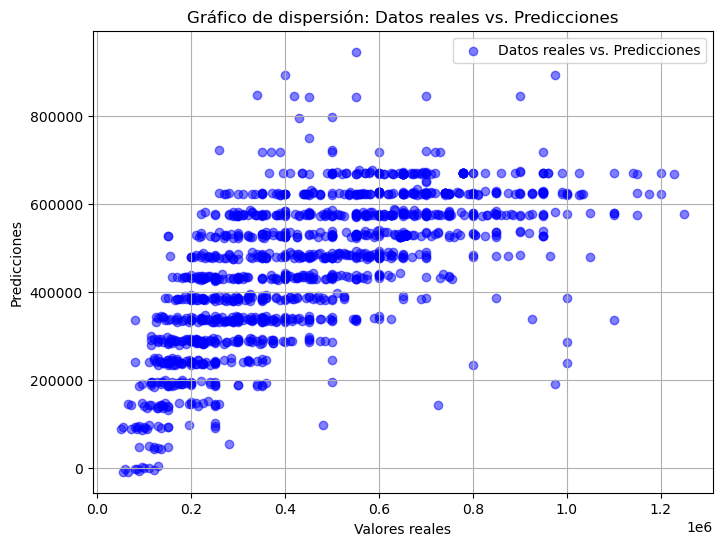

In [26]:
# Gráfico de dispersión de datos reales vs. predicciones

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, prediccion, color='blue', label='Datos reales vs. Predicciones', alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Datos reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()

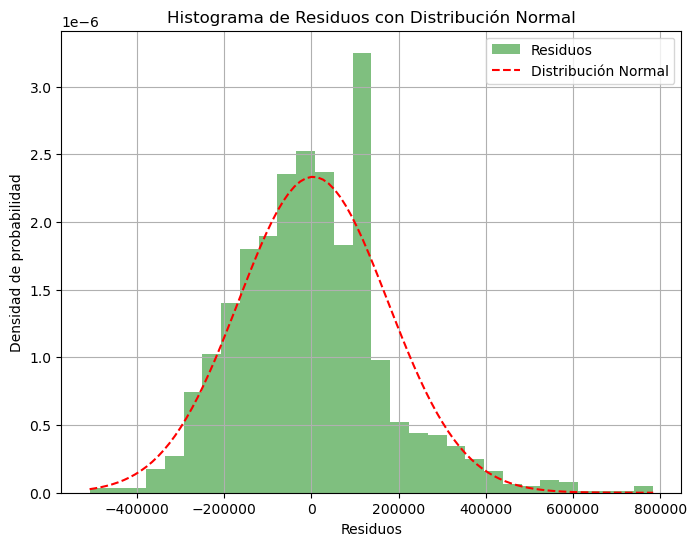

In [27]:
# Calcular los residuos
residuos = Y_test - prediccion

# Histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color='green', alpha=0.5, density=True, label='Residuos')

# Ajustar una distribución normal a los residuos
media = np.mean(residuos)
desviacion_estandar = np.std(residuos)
x = np.linspace(min(residuos), max(residuos), 100)
curva_normal = stats.norm.pdf(x, media, desviacion_estandar)
plt.plot(x, curva_normal, 'r--', label='Distribución Normal')

plt.xlabel('Residuos')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de Residuos con Distribución Normal')
plt.legend()
plt.grid(True)
plt.show()

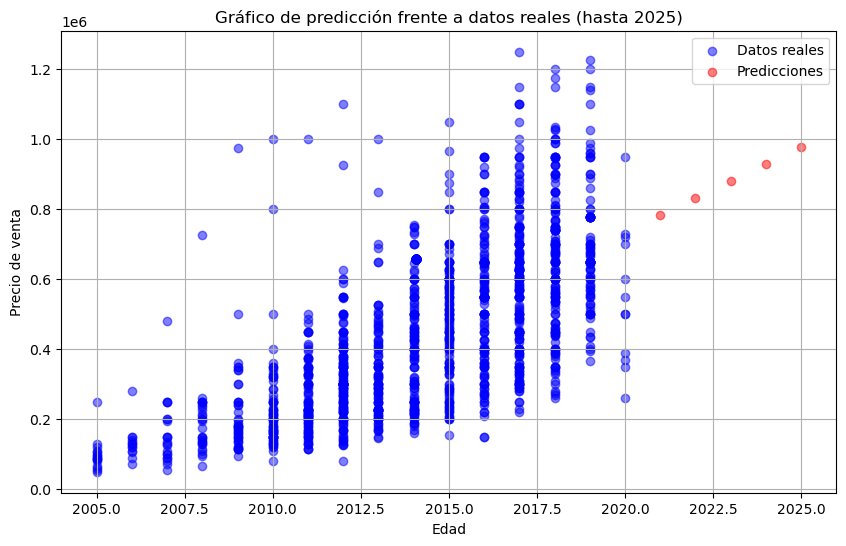

[783892.48797466 832579.92496625 881267.36195782 929954.79894941
 978642.23594099]


In [28]:
# Crear DataFrame para los nuevos años con 'asientos' incluido
nuevos_años = pd.DataFrame({'edad': range(2021, 2026),
                            'km_recorridos': [X_train['km_recorridos'].mean()] * 5,
                            'asientos': [X_train['asientos'].mean()] * 5})

# Predicciones para los nuevos años
predicciones_2021_2025 = modelo_regresion.predict(nuevos_años)

# Graficar resultados
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de datos reales
plt.scatter(X_test['edad'], Y_test, color='blue', label='Datos reales', alpha=0.5)

# Gráfico de dispersión de predicciones
plt.scatter(nuevos_años['edad'], predicciones_2021_2025, color='red', label='Predicciones', alpha=0.5)

plt.xlabel('Edad')
plt.ylabel('Precio de venta')
plt.title('Gráfico de predicción frente a datos reales (hasta 2025)')
plt.legend()
plt.grid(True)
plt.show()

print (predicciones_2021_2025)